# Data Preparation

Data preparation is one of the main steps in data mining process
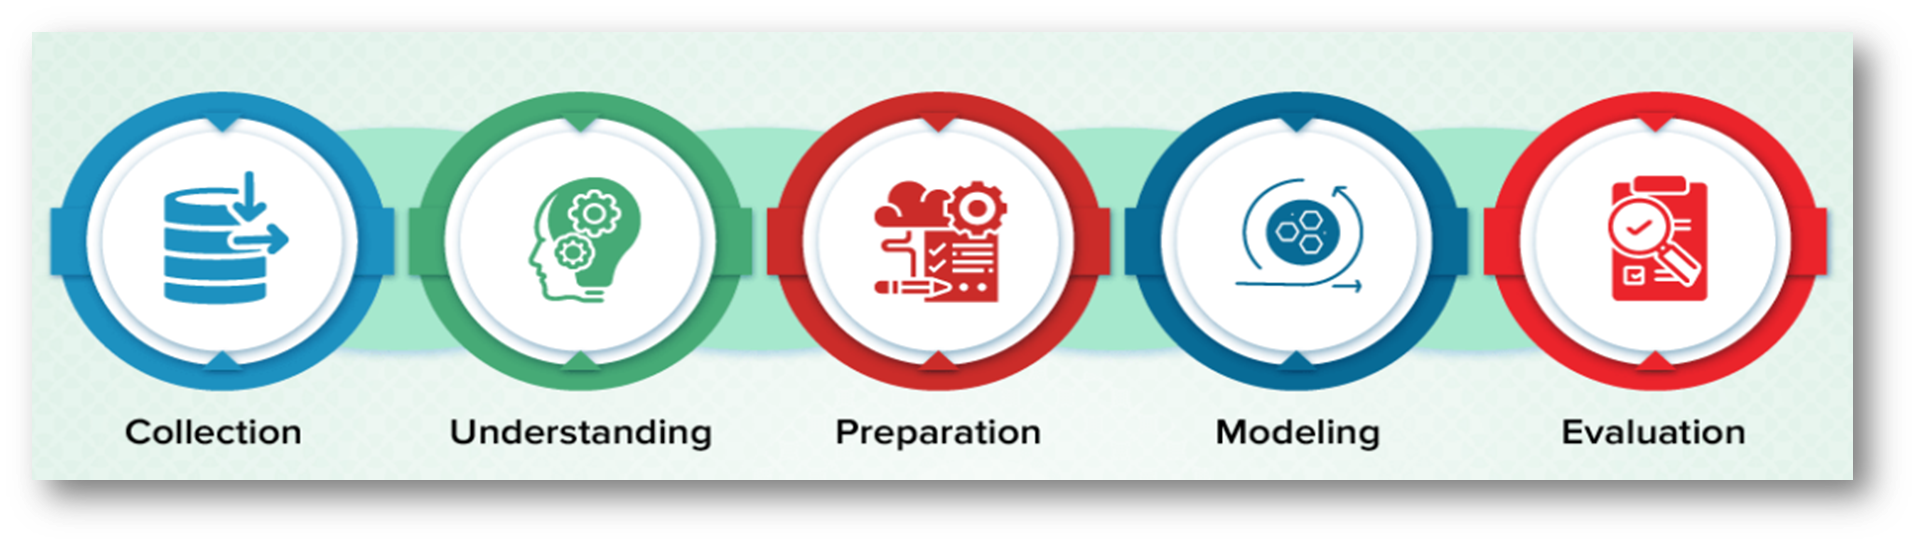

it includes several types of tasks that we will apply on our dashboard case study
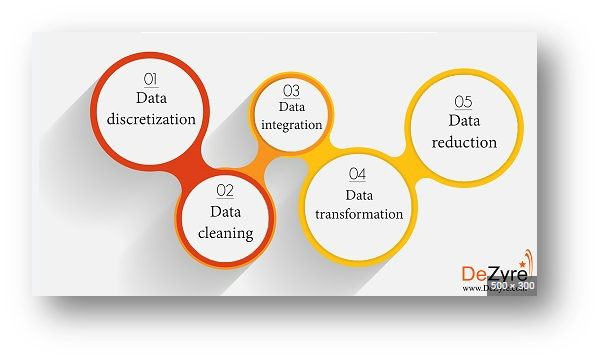

Let's first intriduce our case study:
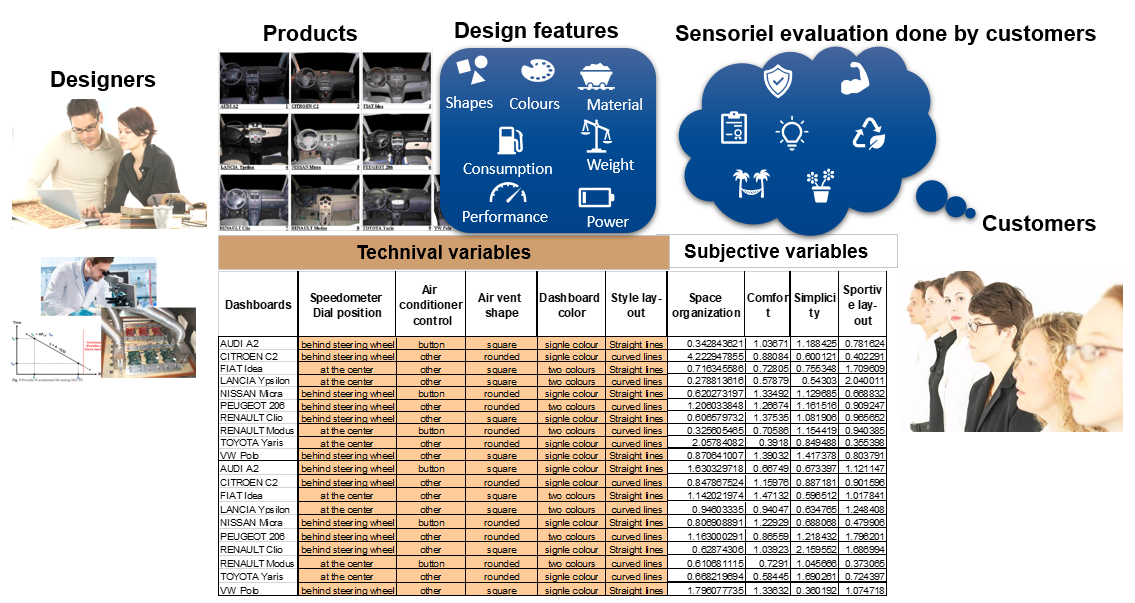
- We have 10 cars dashboards, from different brands
- Each dashboard is described according to 7 design features: 'Speedometer Dial position', 'Display lay-out','Air conditioner control', 'Air vent shape', 'Dashboard color', 'Arrangement space', 'Style lay-out', 
- We have collected the assessement of each dashboard by several customers (~2000), according to 11 perceptual features:'Space organization', 'Control comprehensibility', 'Aerator lay-out', 'Arrangement space perception', 'Comfort', 'Simplicity', 'Sportive lay-out', 'Masculinity', 'Quality', 'Novelty', 'Harmony'

D'abord on apporte les bibliothèques nécessaires.
- Panda, dédiée à l'analyse des données
- Sklearn, dédiée à l'analyse prédictive de données
- Matplotlib, dédiée à la visualisation de données sous forme de graphiques
- Numpy, dédiée à la manipulation de matrices multi-dimensionnelles
- Os, dédié à l'interaction avec le système d'exploitation

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy
import os

On récupère la donnée brute, sous forme de fichier Excel, en précisant le nom du fichier dans la variable 'filename' et son chemin d'accès sur l'ordinateur dans la variable 'file_path'. On stocke les données dans la variable 'data'.

In [3]:
path = r"D:\Etudes\CS\3A\2_DS\6_Data Driven Design\Cours 1\TD 1"
filename = 'Dashboards_raw data' + '.xlsx'
file_path = r"%s\%s" % (path, filename)

data = pd.read_excel(file_path)

The loaded object "data" is called data frame. See this link about some of the main functions that could applied on a data frame 
https://www.analyticsvidhya.com/blog/2022/07/pandas-functions-you-should-know-for-data-analysis/

On visualise les 4 premières lignes du dataframe 'data', ce qui nous permet que les données ont bien été collectées et de les confronter le document Excel.

In [10]:
data.head(4)

Dashboards Speedometer Dial position Display lay-out  \
0    AUDI A2     behind steering wheel        analogue   
1    AUDI A2     behind steering wheel        analogue   
2    AUDI A2     behind steering wheel        analogue   
3    AUDI A2     behind steering wheel        analogue   

  Air conditioner control Air vent shape Dashboard color Arrangement space  \
0                  button         square   signle colour              many   
1                  button         square   signle colour              many   
2                  button         square   signle colour              many   
3                  button         square   signle colour              many   

    Style lay-out  Space organization  Control comprehensibility  \
0  Straight lines            1.450467                   0.274412   
1  Straight lines            1.494907                   0.542454   
2  Straight lines            1.218555                   0.251733   
3  Straight lines            1.582660                   0.502153   

   Aerator lay-out  Arrangement space perception   Comfort  Simplicity  \
0         0.508663                      1.195646  0.994656    1.387392   
1         0.913278                      1.658658  0.878994    1.500000   
2         0.508663                      1.213164  0.621023    0.685520   
3         0.733291                      1.414931  0.759221    0.591908   

   Sportive lay-out  Masculinity   Quality   Novelty   Harmony  
0          0.935571     1.832030  1.522825  0.659925  0.621599  
1          0.781624     1.324876  0.934648  0.349055  0.550753  
2          1.102452     2.376149  1.596414  0.557546  0.782384  
3          0.989090     2.084871  1.062366  0.663976  0.980191

In [7]:
print(f'The dimension of the data is {data.shape}')

The dimension of the data is (2000, 19)


Le dataframe étudié 'data' comprend 2000 lignes, qui correspondent à des dashboards et 19 colonnes, qui correspondent à des caractéristiques spécifiques comme des notations de confort, simplicité, qualité ou masculinité.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dashboards                    2000 non-null   object 
 1   Speedometer Dial position     2000 non-null   object 
 2   Display lay-out               2000 non-null   object 
 3   Air conditioner control       2000 non-null   object 
 4   Air vent shape                2000 non-null   object 
 5   Dashboard color               2000 non-null   object 
 6   Arrangement space             2000 non-null   object 
 7   Style lay-out                 2000 non-null   object 
 8   Space organization            1999 non-null   float64
 9   Control comprehensibility     1994 non-null   float64
 10  Aerator lay-out               1996 non-null   float64
 11  Arrangement space perception  1995 non-null   float64
 12  Comfort                       2000 non-null   float64
 13  Sim

Le dataframe étudié comprend donc 19 colonnes. La colonne Non-Null Count permet de vérifier les informations manquantes : au premier abord, on peut considérer que les données sont consistantes étant donné le très faible nombre de cellules vides par rapport aux 2000 lignes recensées. La colonne Dtype précise aussi le type de variable dans laquelle les données de l'Excel de référence ont été importées : ici le type "objet" (qui ne correspondent pas à des nombres) et "float64" (correspondant à des nombres)

In [9]:
categ_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categ_columns)

['Dashboards', 'Speedometer Dial position', 'Display lay-out', 'Air conditioner control', 'Air vent shape', 'Dashboard color', 'Arrangement space', 'Style lay-out']


On extrait les noms de colonnes correspondant à des types objet : cela correspond aux variables "techniques" et "objectives" des dashboard, en opposition aux variables flottantes qui correspondent à des notation issues de retours utilisateurs. On les stocke dans la variable 'categ_columns'

In [10]:
categ_columns = categ_columns[1:]
print(categ_columns)

['Speedometer Dial position', 'Display lay-out', 'Air conditioner control', 'Air vent shape', 'Dashboard color', 'Arrangement space', 'Style lay-out']


On élimine la première valeur qui correspond au modèle de véhicule.

In [13]:
num_columns = data.select_dtypes(include=['float64']).columns.tolist()
#we can also use data._get_numeric_data().columns.tolist()
print(num_columns)

['Space organization', 'Control comprehensibility', 'Aerator lay-out', 'Arrangement space perception', 'Comfort', 'Simplicity', 'Sportive lay-out', 'Masculinity', 'Quality', 'Novelty', 'Harmony']


In [14]:
data.describe()

Space organization  Control comprehensibility  Aerator lay-out  \
count         1999.000000                1994.000000      1996.000000   
mean             0.898389                   0.913453         1.000926   
std              0.338088                   0.404441         4.470557   
min              0.197665                   0.111587         0.167909   
25%              0.667185                   0.589022         0.668237   
50%              0.877282                   0.860960         0.880183   
75%              1.066460                   1.215827         1.108257   
max              1.796078                   2.046427       200.000000   

       Arrangement space perception      Comfort   Simplicity  \
count                   1995.000000  2000.000000  1999.000000   
mean                       0.996894     1.454494     0.978798   
std                        0.383943    15.779393     0.358272   
min                        0.359269     0.391805     0.297023   
25%                        0.679420     0.752706     0.703918   
50%                        0.918982     0.941387     0.959921   
75%                        1.290712     1.140363     1.196210   
max                        2.367078   500.000000     2.450408   

       Sportive lay-out  Masculinity      Quality      Novelty      Harmony  
count       1998.000000  1999.000000  1997.000000  1999.000000  2000.000000  
mean           0.892337     0.922302     1.329714     1.138776     0.899086  
std            2.292581     0.516766    15.645359     0.546707     0.260939  
min         -100.000000     0.144708     0.366294     0.199110     0.264765  
25%            0.726766     0.543012     0.760524     0.680456     0.713488  
50%            0.920509     0.805960     0.929238     0.996528     0.888472  
75%            1.118495     1.180635     1.100000     1.556311     1.068049  
max            2.541265     2.724929   700.000000     2.500000     1.495300

La fonction describe permet d'obtenir une vision globale du dataframe étudié du point de vue des variables numériques (de type 'float64'), avec les lignes suivantes :
- count : qui compte le nombre de cellules non-vides
- mean : qui calcule la valeur moyenne
- std : qui renvoie l'écart type
- min : la valeur minimale
- 25%-50%-75% : les valeurs des quartiles, donnant des informations sur la répartition des résultats.
- max : la valeur maximale

In [13]:
data.describe(include = 'all')

Dashboards Speedometer Dial position Display lay-out  \
count        2000                      2000            2000   
unique         10                         2               2   
top       AUDI A2     behind steering wheel        analogue   
freq          200                      1200            1400   
mean          NaN                       NaN             NaN   
std           NaN                       NaN             NaN   
min           NaN                       NaN             NaN   
25%           NaN                       NaN             NaN   
50%           NaN                       NaN             NaN   
75%           NaN                       NaN             NaN   
max           NaN                       NaN             NaN   

       Air conditioner control Air vent shape Dashboard color  \
count                     2000           2000            2000   
unique                       2              2               2   
top                      other         square   signle colour   
freq                      1400           1000            1200   
mean                       NaN            NaN             NaN   
std                        NaN            NaN             NaN   
min                        NaN            NaN             NaN   
25%                        NaN            NaN             NaN   
50%                        NaN            NaN             NaN   
75%                        NaN            NaN             NaN   
max                        NaN            NaN             NaN   

       Arrangement space   Style lay-out  Space organization  \
count               2000            2000         1999.000000   
unique                 2               2                 NaN   
top                 many  Straight lines                 NaN   
freq                1000            1000                 NaN   
mean                 NaN             NaN            0.898389   
std                  NaN             NaN            0.338088   
min                  NaN             NaN            0.197665   
25%                  NaN             NaN            0.667185   
50%                  NaN             NaN            0.877282   
75%                  NaN             NaN            1.066460   
max                  NaN             NaN            1.796078   

        Control comprehensibility  Aerator lay-out  \
count                 1994.000000      1996.000000   
unique                        NaN              NaN   
top                           NaN              NaN   
freq                          NaN              NaN   
mean                     0.913453         1.000926   
std                      0.404441         4.470557   
min                      0.111587         0.167909   
25%                      0.589022         0.668237   
50%                      0.860960         0.880183   
75%                      1.215827         1.108257   
max                      2.046427       200.000000   

        Arrangement space perception      Comfort   Simplicity  \
count                    1995.000000  2000.000000  1999.000000   
unique                           NaN          NaN          NaN   
top                              NaN          NaN          NaN   
freq                             NaN          NaN          NaN   
mean                        0.996894     1.454494     0.978798   
std                         0.383943    15.779393     0.358272   
min                         0.359269     0.391805     0.297023   
25%                         0.679420     0.752706     0.703918   
50%                         0.918982     0.941387     0.959921   
75%                         1.290712     1.140363     1.196210   
max                         2.367078   500.000000     2.450408   

        Sportive lay-out  Masculinity      Quality      Novelty      Harmony  
count        1998.000000  1999.000000  1997.000000  1999.000000  2000.000000  
unique               NaN          NaN          NaN          NaN          NaN  
top                  

On vient d'inclure les variables non numériques à la description globale du dataframe. Les valeurs numériques calculées précédemment n'ont plus de sens pour ces variables de type "object'. En revanche, de nouvelles lignes apparaissent :
- unique : décompte les valeurs différentes prises par la variable en question
- top : renvoie la valeur prédominante dans le dataframe
- freq : la fréquence (le nombre d'occurences) de cette valeur prédominante dans le dataframe

Lorsque ces calculs n'ont pas de sens vis-à-vis du type de la variable étudié, la fonction 'describe' renvoie 'NaN'.

In [14]:
data[categ_columns].describe(include = 'all')

Speedometer Dial position Display lay-out Air conditioner control  \
count                       2000            2000                    2000   
unique                         2               2                       2   
top        behind steering wheel        analogue                   other   
freq                        1200            1400                    1400   

       Air vent shape Dashboard color Arrangement space   Style lay-out  
count            2000            2000              2000            2000  
unique              2               2                 2               2  
top            square   signle colour              many  Straight lines  
freq             1000            1200              1000            1000

On extrait dans la variable 'data' les variables de type 'object' avant d'appliquer la fonction 'describe' qui ne renvoie alors que les valeurs pertinentes du point de vue du type de l'objet.

In [15]:
data.isnull().values.any()

True

Il y a des valeurs manquantes dans le dataframe.

In [16]:
print('Data info:\n')
print(data.info())

Data info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Dashboards                    2000 non-null   object 
 1   Speedometer Dial position     2000 non-null   object 
 2   Display lay-out               2000 non-null   object 
 3   Air conditioner control       2000 non-null   object 
 4   Air vent shape                2000 non-null   object 
 5   Dashboard color               2000 non-null   object 
 6   Arrangement space             2000 non-null   object 
 7   Style lay-out                 2000 non-null   object 
 8   Space organization            1999 non-null   float64
 9   Control comprehensibility     1994 non-null   float64
 10  Aerator lay-out               1996 non-null   float64
 11  Arrangement space perception  1995 non-null   float64
 12  Comfort                       2000 non-null   floa

La colonne 'Non-null count' permet d'identifier combien de cellules sur les 2000 entrée sont "remplies", et ce pour chacune des variables.

In [15]:
data.isnull().sum()

Dashboards                      0
Speedometer Dial position       0
Display lay-out                 0
Air conditioner control         0
Air vent shape                  0
Dashboard color                 0
Arrangement space               0
Style lay-out                   0
Space organization              1
Control comprehensibility       6
Aerator lay-out                 4
Arrangement space perception    5
Comfort                         0
Simplicity                      1
Sportive lay-out                2
Masculinity                     1
Quality                         3
Novelty                         1
Harmony                         0
dtype: int64

la fonction isnull().sum() renvoie le nombre de cellules vides pour chaque variable du dataframe.

In [16]:
index_missing_value = data[data['Space organization'].isnull()==True].index
index_missing_value

Int64Index([1828], dtype='int64')

Du point de vue de la variable 'Space organization', la seule cellule vide (correspondant à une donnée manquante) porte l'indice 1828 et correspond donc à la 1829e ligne du tableau.

In [20]:
data.iloc[index_missing_value]

Dashboards Speedometer Dial position Display lay-out  \
1828  TOYOTA Yaris             at the center         digital   

     Air conditioner control Air vent shape Dashboard color Arrangement space  \
1828                   other        rounded   signle colour              many   

     Style lay-out  Space organization  Control comprehensibility  \
1828  curved lines                 NaN                   0.737675   

      Aerator lay-out  Arrangement space perception   Comfort  Simplicity  \
1828         0.873967                      1.565645  0.391805    0.622958   

      Sportive lay-out  Masculinity   Quality   Novelty   Harmony  
1828          0.672978     0.636062  0.802143  1.640233  0.745788

On affiche la ligne correspondant à la donnée manquante pour la variable 'Space Organization'

In [17]:
missing_values = ["n/a", "na", "--"]
#df = pd.read_csv("property data.csv", na_values = missing_values)
#data = pd.read_excel(data_path,na_values = missing_values)

In [18]:
data.isnull().sum()

Dashboards                      0
Speedometer Dial position       0
Display lay-out                 0
Air conditioner control         0
Air vent shape                  0
Dashboard color                 0
Arrangement space               0
Style lay-out                   0
Space organization              1
Control comprehensibility       6
Aerator lay-out                 4
Arrangement space perception    5
Comfort                         0
Simplicity                      1
Sportive lay-out                2
Masculinity                     1
Quality                         3
Novelty                         1
Harmony                         0
dtype: int64

In [20]:
Space_org_mean = data['Space organization'].mean()
Space_org_mean

0.8983893900845401

On calcule la valeur moyenne sur l'ensemble du tableau (c'est-à-dire l'ensemble des dashboards proposés) pour la variable 'Space Organization'.

In [21]:
data['Space organization'].fillna(Space_org_mean, inplace=True)

La fonction fillna() permet d'insérer la valeur 'Space_org_mean' dans toutes les cellules qui étaient vides auparavant.

In [22]:
data.isnull().sum()

Dashboards                      0
Speedometer Dial position       0
Display lay-out                 0
Air conditioner control         0
Air vent shape                  0
Dashboard color                 0
Arrangement space               0
Style lay-out                   0
Space organization              0
Control comprehensibility       6
Aerator lay-out                 4
Arrangement space perception    5
Comfort                         0
Simplicity                      1
Sportive lay-out                2
Masculinity                     1
Quality                         3
Novelty                         1
Harmony                         0
dtype: int64

La colonne 'Space Organization' ne comprend plus aucune cellule vide.

In [23]:
data = data[data['Control comprehensibility'].notna()]

In [30]:
data=data.dropna()

La fonction dropna() permet de supprimer toutes les lignes possédant des cellules vides d'un dataframe.

In [31]:
data.isnull().sum()

Dashboards                      0
Speedometer Dial position       0
Display lay-out                 0
Air conditioner control         0
Air vent shape                  0
Dashboard color                 0
Arrangement space               0
Style lay-out                   0
Space organization              0
Control comprehensibility       0
Aerator lay-out                 0
Arrangement space perception    0
Comfort                         0
Simplicity                      0
Sportive lay-out                0
Masculinity                     0
Quality                         0
Novelty                         0
Harmony                         0
dtype: int64

In [32]:
data.shape

(1977, 19)

Le dataframe 'data' ne comprend plus aucune cellule vide, pour l'ensemble de ses variables, et sa dimension a bien diminué, puisqu'on a supprimé des colonnes, de 2000 à 1977 lignes.

In [33]:
data.describe()

Space organization  Control comprehensibility  Aerator lay-out  \
count         1977.000000                1977.000000      1977.000000   
mean             0.899484                   0.914056         1.002903   
std              0.338993                   0.405229         4.491798   
min              0.197665                   0.111587         0.167909   
25%              0.666977                   0.585917         0.672485   
50%              0.877282                   0.865721         0.880505   
75%              1.073924                   1.216690         1.108257   
max              1.796078                   2.046427       200.000000   

       Arrangement space perception      Comfort   Simplicity  \
count                   1977.000000  1977.000000  1977.000000   
mean                       0.999518     1.459538     0.976924   
std                        0.384163    15.870876     0.358229   
min                        0.359269     0.391805     0.297023   
25%                        0.680036     0.751943     0.703289   
50%                        0.922880     0.940825     0.959049   
75%                        1.295586     1.139130     1.192284   
max                        2.367078   500.000000     2.450408   

       Sportive lay-out  Masculinity      Quality      Novelty      Harmony  
count       1977.000000  1977.000000  1977.000000  1977.000000  1977.000000  
mean           0.892523     0.923715     1.334814     1.138543     0.897600  
std            2.304485     0.518642    15.724242     0.547785     0.260700  
min         -100.000000     0.144708     0.366294     0.199110     0.264765  
25%            0.729452     0.542761     0.763226     0.678837     0.712325  
50%            0.920413     0.805064     0.930152     0.996528     0.888026  
75%            1.120380     1.184814     1.100000     1.555189     1.066949  
max            2.541265     2.724929   700.000000     2.500000     1.495300

On peut analyser à nouveau les valeurs caractéristiques de chaque variables, qui ne sont pas biaisées par des valeurs manquantes.

In [25]:
q_low = data["Aerator lay-out"].quantile(0.01)
q_hi  = data["Aerator lay-out"].quantile(0.99)

data = data[(data["Aerator lay-out"] < q_hi) & (data["Aerator lay-out"] > q_low)]

On ne conserve dans la variable data les 98% des valeurs "centrales" du point de vue de la variable 'Aerotor lay-out', c'est-à-dire en excluant les quartiles à 1% et 99%, ce qui modifie en particulier la valeur de l'écart-type et des quartiles pour ces variables, mais a aussi une influence sur toutes les autres valeurs calculées par la fonction descirbe() puisqu'une partie des variables ont disparu.

In [26]:
data.describe()

Space organization  Control comprehensibility  Aerator lay-out  \
count         1910.000000                1910.000000      1910.000000   
mean             0.915524                   0.916971         0.896914   
std              0.332664                   0.409745         0.319658   
min              0.197665                   0.111587         0.236535   
25%              0.686943                   0.583289         0.683453   
50%              0.888489                   0.866279         0.880382   
75%              1.085587                   1.228455         1.090581   
max              1.796078                   2.046427         1.777915   

       Arrangement space perception      Comfort   Simplicity  \
count                   1905.000000  1910.000000  1909.000000   
mean                       0.996646     1.474791     0.976014   
std                        0.387143    16.146698     0.360589   
min                        0.359269     0.391805     0.297023   
25%                        0.677899     0.746557     0.700354   
50%                        0.916245     0.937237     0.959049   
75%                        1.295586     1.139750     1.194944   
max                        2.367078   500.000000     2.450408   

       Sportive lay-out  Masculinity      Quality      Novelty      Harmony  
count       1908.000000  1909.000000  1907.000000  1909.000000  1910.000000  
mean           0.896294     0.934877     0.986443     1.112675     0.883288  
std            2.345419     0.521587     0.312659     0.531553     0.252955  
min         -100.000000     0.144708     0.366294     0.199110     0.264765  
25%            0.731582     0.552186     0.764961     0.668886     0.703169  
50%            0.927244     0.815687     0.934654     0.981106     0.869961  
75%            1.125866     1.200000     1.111848     1.524118     1.047288  
max            2.541265     2.724929     2.051305     2.500000     1.495300

In [27]:
for column in ['Comfort','Quality','Sportive lay-out']:
    q_low = data[column].quantile(0.01)
    q_hi  = data[column].quantile(0.99)
    data = data[(data[column] < q_hi) & (data[column] > q_low)]

On effectue la même opération pour les variables 'Comfort', 'Quality' et 'Sportive lay-out'. On recentre donc notre échantillon du point de vue des 4 variables évoquées précédemment. Cela diminue sensiblement les valeurs des écart-types et rapproche les différents quartiles. Cela permet surtout d'éliminer des valeurs abhérrantes, qu'on a pu relever en analysant la colonne max par rapport aux valeurs de quartiles notamment.

In [28]:
data.describe()

Space organization  Control comprehensibility  Aerator lay-out  \
count         1789.000000                1789.000000      1789.000000   
mean             0.924336                   0.912094         0.892339   
std              0.334065                   0.409891         0.314899   
min              0.197665                   0.111587         0.236535   
25%              0.694418                   0.578951         0.683488   
50%              0.893172                   0.857255         0.877976   
75%              1.100000                   1.219695         1.073377   
max              1.796078                   2.046427         1.777915   

       Arrangement space perception      Comfort   Simplicity  \
count                   1784.000000  1789.000000  1788.000000   
mean                       0.990182     0.954209     0.977913   
std                        0.383699     0.243399     0.359539   
min                        0.359269     0.476245     0.297023   
25%                        0.676707     0.754918     0.703381   
50%                        0.905786     0.942688     0.961494   
75%                        1.280928     1.137998     1.195220   
max                        2.367078     1.520684     2.450408   

       Sportive lay-out  Masculinity      Quality      Novelty      Harmony  
count       1789.000000  1788.000000  1789.000000  1788.000000  1789.000000  
mean           0.955662     0.952469     0.986786     1.095507     0.877746  
std            0.290094     0.520773     0.297948     0.522191     0.251760  
min            0.382987     0.144708     0.434429     0.199110     0.264765  
25%            0.740254     0.579350     0.772078     0.663874     0.699594  
50%            0.930255     0.836398     0.935136     0.970635     0.864325  
75%            1.134665     1.201184     1.110375     1.512790     1.039544  
max            1.740763     2.724929     1.737834     2.500000     1.495300

In [29]:
import seaborn as sns

Seaborn est une bibliothèque permettant de visualiser des données, notamment en mettant en forme des graphes statistiques.

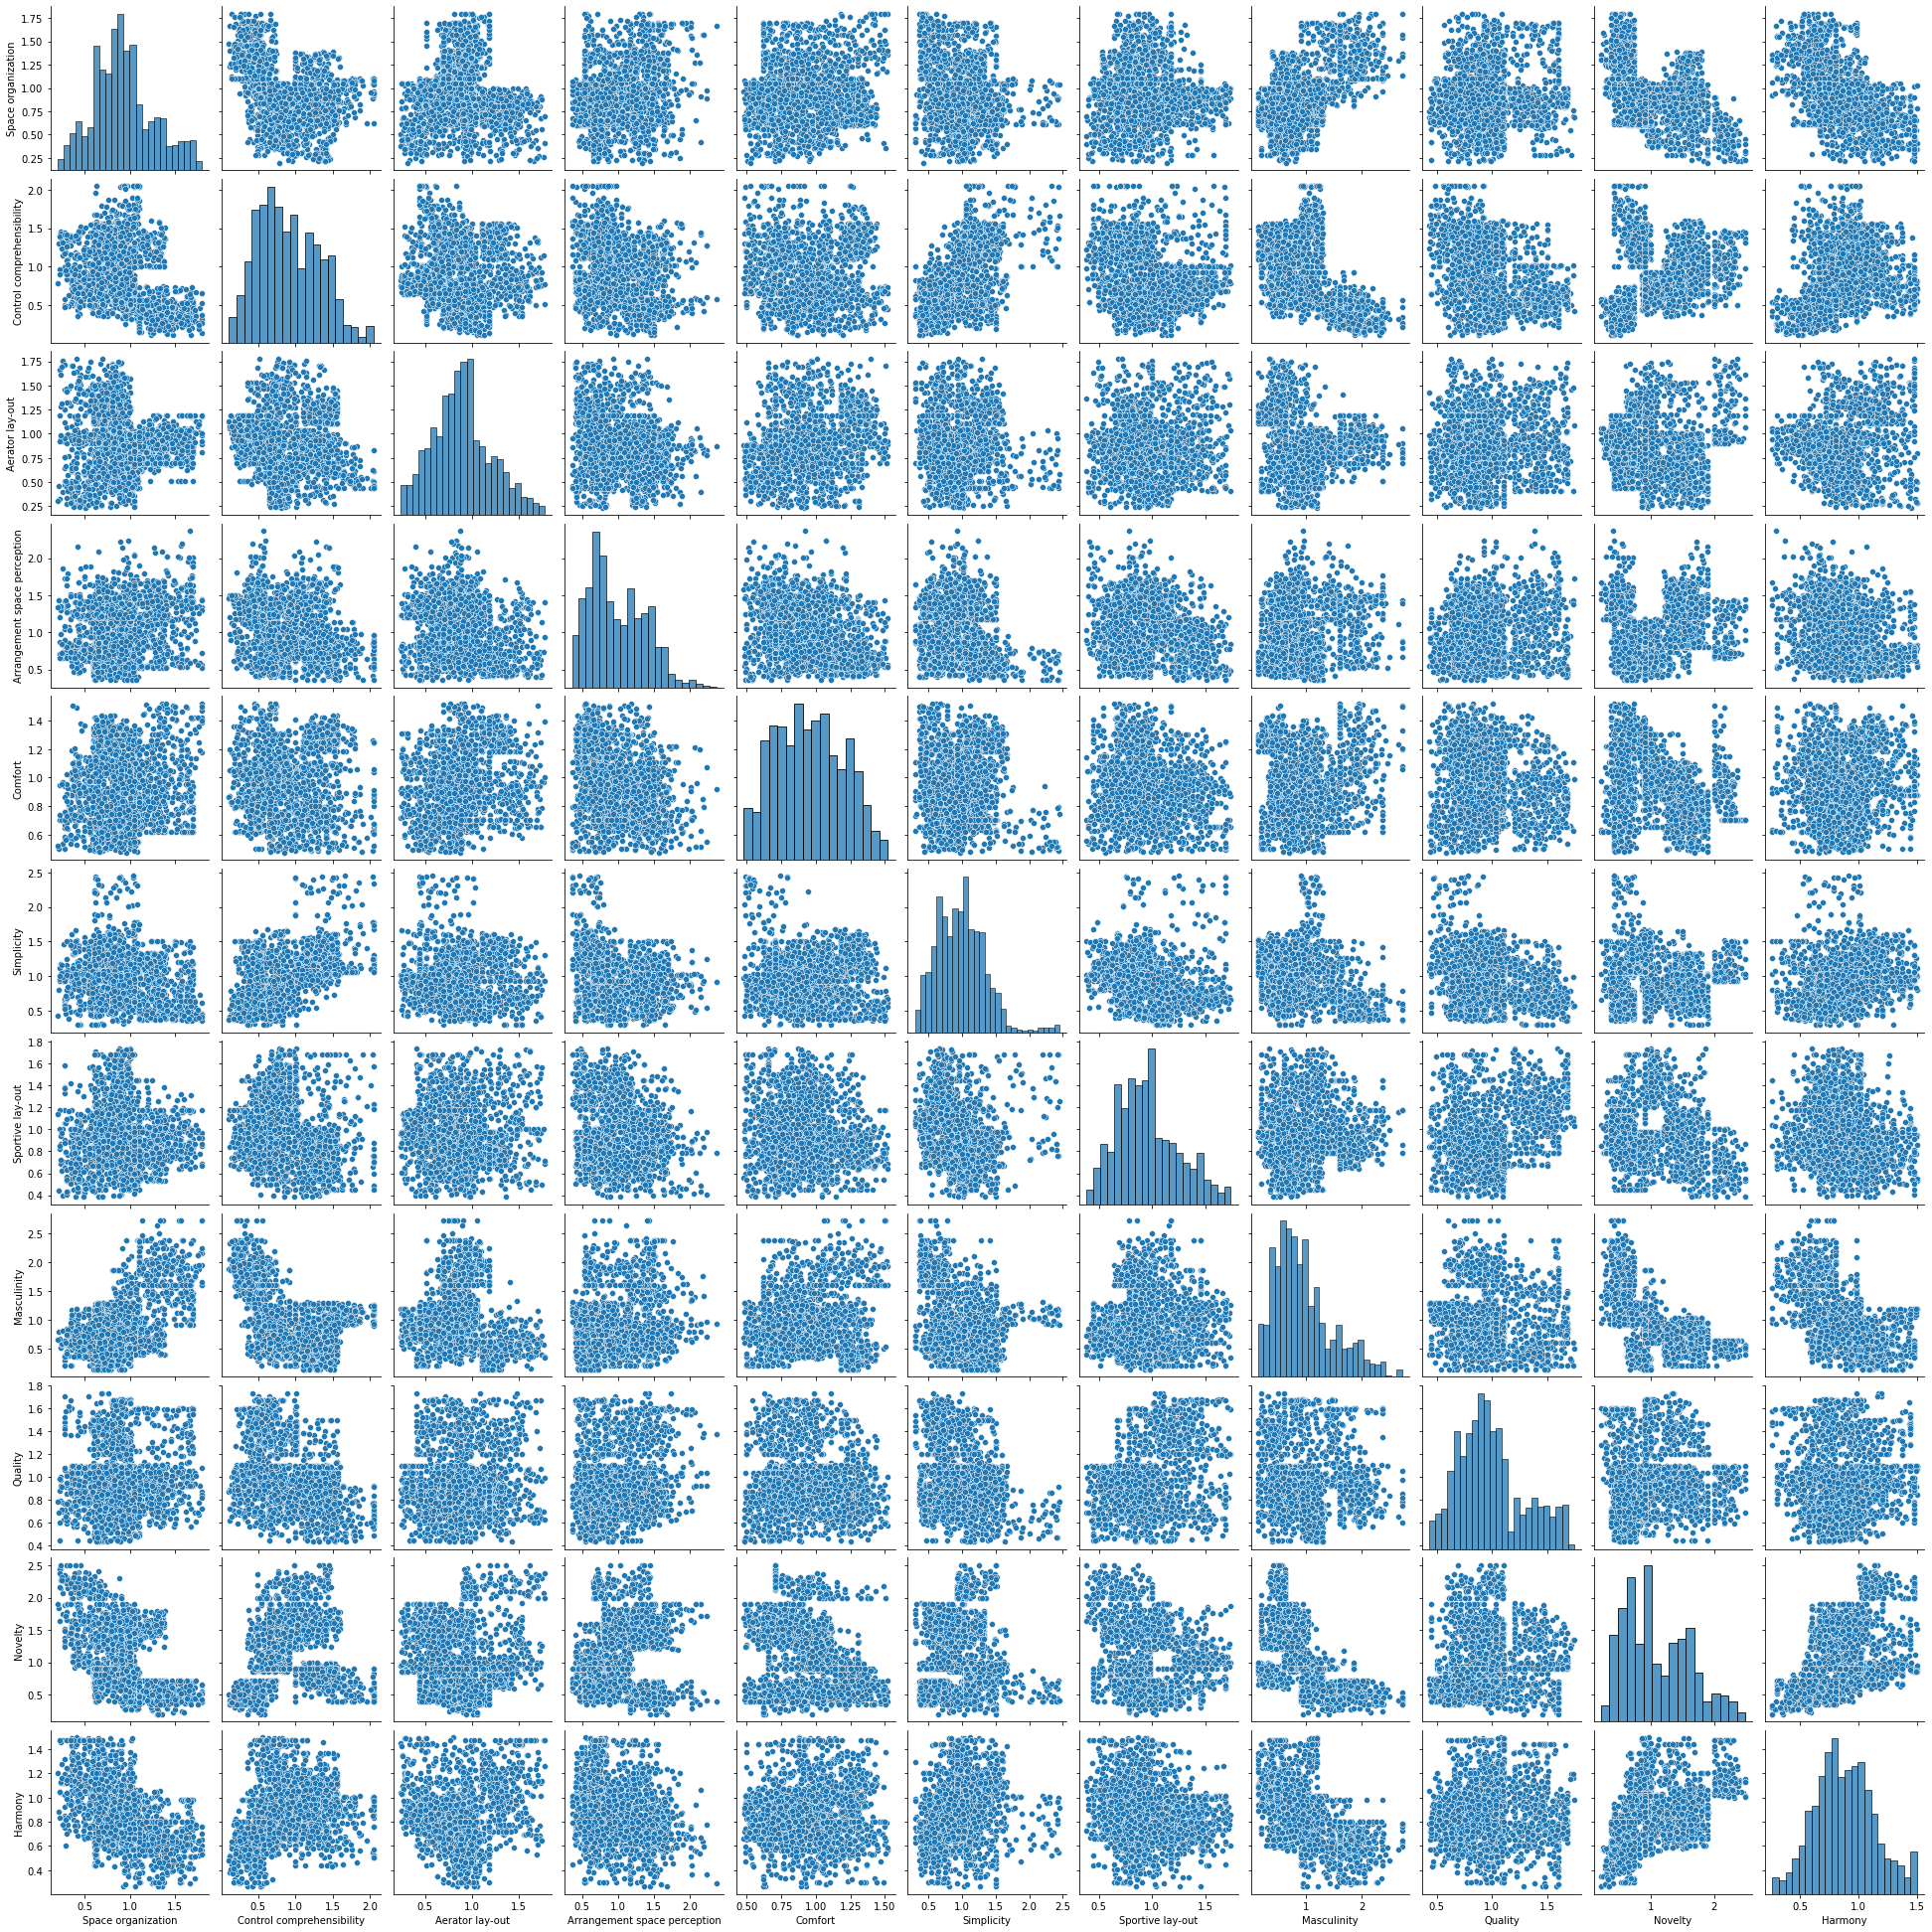

In [31]:
sns.pairplot(data)

La fonction pairplot() permet de tracer les diagrammes de dispersion pour des couples de variables, afin d'éprouver visuellement la corrélation entre ces deux variables.
Par exemple, un dashboard "nouveau" va être associé à un dashboard moins "masculin" en moyenne.
En revanche, il ne semble pas avoir de corrélation entre le "confort" et "l'harmonie", car les points sont assez distribués et également répartis sur l'ensemble du graphe.

<AxesSubplot:>

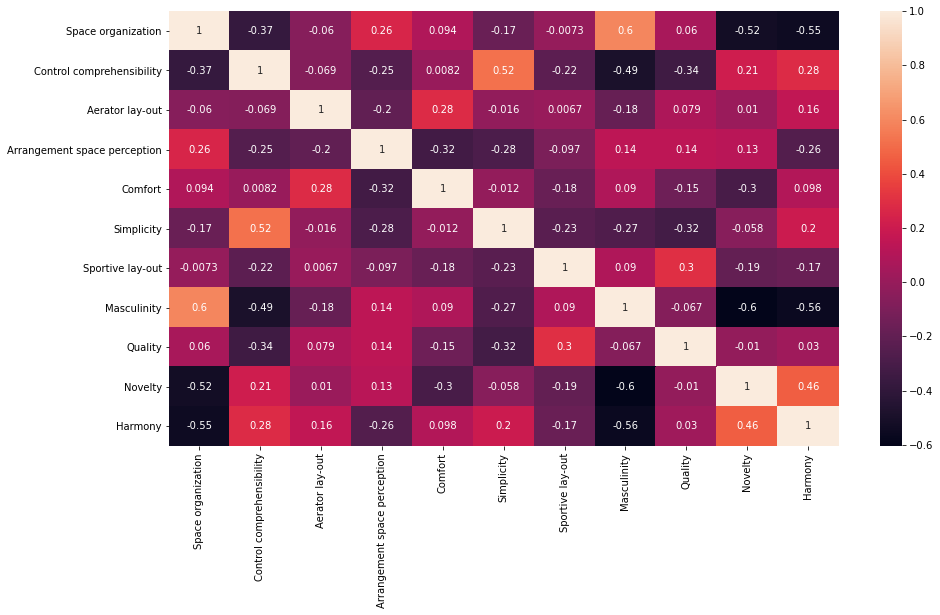

In [33]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True)

La fonction heatmap() permet d'analyser le niveau de corrélation entre deux valeurs de façon plus chiffrée. Plus les variables sont proches de 1 en valeur absolue, plus elles sont corrélées (les valeurs négatives correspondent aux valeurs inversement décorrélées par exemple la "masculinité" qui est "opposée" à "l'harmonie"). Plus la valeur est proche de 0, plus les variables sont décorrélées.

In [42]:
data_dummy = pd.get_dummies(data=data, drop_first=True)
data_dummy.head(4)
print(data.shape)
print(data_dummy.shape)

(1789, 19)
(1789, 27)


La méthode get_dummies permet de "convertir" les variables de type 'object' en variables numériques, ce qui va permettre d'appliquer des méthodes numériques. Pour chaque variable 'value' de type 'object', prenant les valeurs  [value1,value2,value3], 3 nouvelles colonnes sont créées 'value_value1', 'value_value2', 'value_value3'. On affecte à chacune de ces nouvelles variablesvalue_valuei la valeur 1 si value=valuei, 0 sinon.

La fonction head(4) permet de visualiser les 4 premières colonnes de la dataframe 'data_dummy' ainsi créées, qui comprend donc 8 colonnes supplémentaire par rapport à la dataframe d'origine.

In [43]:
data.groupby('Dashboards').mean()

Space organization  Control comprehensibility  \
Dashboards                                                      
AUDI A2                   1.363711                   0.452292   
CITROEN C2                0.740685                   0.691898   
FIAT Idea                 1.113660                   1.212235   
LANCIA Ypsilon            0.719450                   0.782613   
NISSAN Micra              0.757974                   1.345996   
PEUGEOT 206               0.887771                   0.720680   
RENAULT Clio              0.819989                   1.516310   
RENAULT Modus             0.502877                   1.026294   
TOYOTA Yaris              0.714778                   1.001800   
VW Polo                   1.381420                   0.418232   

                Aerator lay-out  Arrangement space perception   Comfort  \
Dashboards                                                                
AUDI A2                0.841359                      1.441528  0.850254   
CITROEN C2             0.674231                      0.627964  1.060325   
FIAT Idea              0.809939                      1.112230  0.875037   
LANCIA Ypsilon         0.933274                      1.191088  0.786568   
NISSAN Micra           1.261023                      0.607886  1.276650   
PEUGEOT 206            1.051201                      0.771477  0.957181   
RENAULT Clio           0.707935                      0.741478  0.903524   
RENAULT Modus          1.209714                      0.960745  0.935890   
TOYOTA Yaris           0.509553                      1.457399  0.680912   
VW Polo                0.951011                      0.999054  1.171517   

                Simplicity  Sportive lay-out  Masculinity   Quality   Novelty  \
Dashboards                                                                      
AUDI A2           1.007709          1.029363     1.500168  1.248117  0.489951   
CITROEN C2        1.127066          0.832639     0.918317  0.910808  1.079305   
FIAT Idea         1.136040          0.780281     0.721388  0.907039  1.507797   
LANCIA Ypsilon    0.657015          1.223187     0.433506  1.394737  1.474288   
NISSAN Micra      1.297065          0.803864     0.376662  0.953373  0.802662   
PEUGEOT 206       0.694949          1.410155     0.973353  1.185421  1.012934   
RENAULT Clio      1.406632          1.007995     1.121127  0.666921  0.660944   
RENAULT Modus     1.097177          0.687935     0.529593  0.911971  2.178226   
TOYOTA Yaris      0.798529          0.831305     0.738059  0.806595  1.648632   
VW Polo           0.551218          0.872095     1.951832  0.856696  0.548032   

                 Harmony  
Dashboards                
AUDI A2         0.629445  
CITROEN C2      1.086546  
FIAT Idea       0.856269  
LANCIA Ypsilon  1.003277  
NISSAN Micra    1.109220  
PEUGEOT 206     0.782551  
RENAULT Clio    0.790203  
RENAULT Modus   1.193242  
TOYOTA Yaris    0.872986  
VW Polo         0.600912

La fonction groupby calcule les moyennes pour chaque variable numérique sur l'ensemble des lignes de la dataframe pour chaque modèle de véhicule. Par exemple, la moyenne pour la variable 'Comfort' de tous les dashboards de l'Audi A2 est d'environ 0,85.

In [56]:
data_num = data[num_columns]
print(data_num.shape)
data_num.head(3)

(1789, 11)


Space organization  Control comprehensibility  Aerator lay-out  \
0            1.450467                   0.274412         0.508663   
1            1.494907                   0.542454         0.913278   
2            1.218555                   0.251733         0.508663   

   Arrangement space perception   Comfort  Simplicity  Sportive lay-out  \
0                      1.195646  0.994656    1.387392          0.935571   
1                      1.658658  0.878994    1.500000          0.781624   
2                      1.213164  0.621023    0.685520          1.102452   

   Masculinity   Quality   Novelty   Harmony  
0     1.832030  1.522825  0.659925  0.621599  
1     1.324876  0.934648  0.349055  0.550753  
2     2.376149  1.596414  0.557546  0.782384

On extrait un nouveau dataframe contenant uniquement les variables numériques et on visualise les trois premières lignes. Il reste bien uniquement les colonnes contenant des variables numériques.

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(data_num)

In [53]:
pd.DataFrame(X_scaled, columns = num_columns)

Space organization  Control comprehensibility  Aerator lay-out  \
0               1.575377                  -1.556172        -1.218750   
1               1.708441                  -0.902053         0.066513   
2               0.880968                  -1.611517        -1.218750   
3               1.971196                  -1.000402        -0.505218   
4               1.924158                  -1.012565        -0.716203   
...                  ...                        ...              ...   
1784           -0.721470                  -0.481004        -1.399839   
1785            0.308093                  -0.366218        -1.424067   
1786           -0.332804                  -0.493326        -1.239685   
1787           -1.325968                   0.762610        -0.892401   
1788           -0.111854                   0.008907        -0.444003   

      Arrangement space perception   Comfort  Simplicity  Sportive lay-out  \
0                         0.535633  0.166222    1.139221         -0.069274   
1                         1.742678 -0.309104    1.452509         -0.600102   
2                         0.581300 -1.369268   -0.813471          0.506150   
3                         1.107295 -0.801327   -1.073912          0.115266   
4                         1.622943  0.797822   -1.377985          0.385768   
...                            ...       ...         ...               ...   
1784                      0.585541 -1.378544   -1.278893          0.136590   
1785                      0.577631 -0.190515   -1.308798          0.498714   
1786                      0.661667 -1.252977   -0.114791         -1.931411   
1787                           NaN -1.624392   -0.093488         -1.973247   
1788                      1.261175 -1.686936   -0.824983         -0.239333   

      Masculinity   Quality   Novelty   Harmony  
0        1.689426  1.799609 -0.834376 -1.017713  
1        0.715305 -0.175040 -1.429859 -1.299193  
2        2.734548  2.046664 -1.030486 -0.378889  
3        2.175074  0.253739 -0.826616  0.407028  
4        1.458483  2.037674 -0.757610  0.407028  
...           ...       ...       ...       ...  
1784    -0.390867 -0.456328  1.124466  1.105615  
1785    -0.534056 -0.630857  1.325491  1.280364  
1786    -0.396480 -0.993724  1.155366  0.073965  
1787    -0.424365 -0.712132  1.040534 -0.612387  
1788    -0.495967 -0.541188  1.018284 -0.417841  

[1789 rows x 11 columns]

La méthode précédente permet de centrer les valeurs pour chaque variable. Sur l'ensemble des lignes du tableau et pour chaque variable, on force la moyenne à 0 et l'écart-type à 1. Cela permet d'analyser les écarts à la moyenne pour chaque variable tout en ayant des échelles "comparables", pour comparer des écart entre des valeurs différentes et "non-homogènes".

Dans le tableau ci-dessous on constate bien que l'écart-type est égal à 1 et la moyenne est égale à 0 si on considère une précision à 6 ou 7 chiffres après la virgule comme c'est le cas pour les valeurs récoltées dans le dataframe d'origine.

In [47]:
print(pd.DataFrame({'Average':numpy.mean(X_scaled,axis=0),'Std':numpy.std(X_scaled,axis=0,ddof=0)}))

         Average  Std
0  -1.874989e-16  1.0
1   1.249993e-16  1.0
2   1.406242e-16  1.0
3  -8.593700e-17  1.0
4  -1.562491e-17  1.0
5   2.031238e-16  1.0
6   1.796865e-16  1.0
7  -1.562491e-17  1.0
8  -1.562491e-16  1.0
9  -1.171868e-16  1.0
10  1.249993e-16  1.0
